# Unit 3 - A Data Science campaign with pandas and PCA
This unit covers:
* Essential data wrangling with `pandas`;
* Working with different data types;
* Discerning categorical from numerical features;
* Spotting and interpreting the PCA 'variance bug';
* Working with a public data set.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Essential Python tools and concepts – `pandas`

In this practical we will predominantly be working with the `pandas` library. 


In [2]:
import numpy as np
import pandas as pd

### Pandas Series

A Series is a one-dimensional list of values. 

Note the `NaN` value - it means "Not a Number". Originally this represents an undefined numerical, like the result of a division by zero. It is often used to denote missing values. 

In [3]:
values =[1, 3, 5, np.nan, 6, 8] # a list of values
pd.Series(values)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

It can have an index associated with each value. 

In [4]:
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f'])
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

####  Task 1
Add a letter to the index. What happens? How do you need to change the values list to fix the error?

<span style="color:blue">
    
*The length of the values list and the index must match*
*If we add a letter to the index, we will receive a ValueError*

*In the above example provided, the original index has the labels "a," "b," "c," "d," "e," and "f"*
*Adding a letter implies adding the associated value*

*The values list has to be updated with a new value for the new index label in order to correct the problem*
</span>


In [5]:
# here we are adding a value for the new index label 'g'
values = [1, 3, 5, np.nan, 6, 8, 9]  
s = pd.Series(values, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(s)


a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
g    9.0
dtype: float64


### Pandas Data Frames
A **data frame** is like a two-dimensional series.

In [6]:
df = pd.DataFrame(np.random.randn(6,4)) # note the size: 6 rows, 4 columns
df

,0,1,2,3
0,1.175177,-0.152787,0.074022,-0.164188
1,1.035922,1.042633,0.156779,0.383713
2,-0.261534,0.942482,-0.274319,-0.104808
3,1.151414,0.953150,0.728208,-0.726065
4,0.339446,0.846332,0.260309,-0.728376
5,0.230761,0.061705,0.577723,-0.014116


You can pass it an index during construction:

In [7]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=["row {}".format(i) for i in range(6)]) # note the size: 6 rows, 4 columns
df

,0,1,2,3
row 0,1.075947,-0.324457,0.176034,-0.589044
row 1,0.649071,-0.793388,-0.165695,-0.828709
row 2,-0.227887,-0.226719,1.476980,1.255031
row 3,-1.828125,0.331088,-0.747350,0.312642
row 4,0.068741,-1.258891,0.561534,-1.007487
row 5,2.059423,-0.342261,-2.768120,0.519428


Likewise, you can pass column names:

In [8]:
df = pd.DataFrame(np.random.randn(6,4), 
                  index=["row {}".format(i) for i in range(6)],
                  columns=['col {}'.format(i) for i in range(4)]) 
df

,col 0,col 1,col 2,col 3
row 0,1.273919,-0.379305,-1.536504,-0.614627
row 1,-0.107993,-0.472834,-0.777477,-1.849524
row 2,0.201054,-0.625835,-1.272956,-0.752840
row 3,0.120938,1.217072,-0.734028,-0.502761
row 4,-0.344546,-1.365658,1.523513,0.283212
row 5,0.227146,-0.823303,-0.297274,-0.859132


You can also construct it from a dictionary:

In [9]:
columns = {'beep': np.random.randn(6),
           'bop': np.random.randn(6),
           'bup': np.random.randn(6),
           'bap': np.random.randn(6)}
df = pd.DataFrame(columns, index=["row {}".format(i) for i in range(6)])
df

,beep,bop,bup,bap
row 0,-1.236323,-0.020476,0.270442,1.660419
row 1,-2.183477,0.619795,-1.484126,-1.388576
row 2,0.839386,-1.080065,1.655868,0.660555
row 3,1.207750,-0.217924,0.031877,1.654204
row 4,-0.678731,-1.724519,1.623680,0.569010
row 5,-1.413329,-0.872457,1.198569,0.315463


### Data frame addressing
We can now address parts of the data by their row and column names. Columns are addressed like this:

In [10]:
df['bop']

row 0   -0.020476
row 1    0.619795
row 2   -1.080065
row 3   -0.217924
row 4   -1.724519
row 5   -0.872457
Name: bop, dtype: float64

Note that the return value type is a Series, not like a Data Frame! This is because it's one-dimensional.

Extract multiple columns at once by passing a list of column names. Does not need to be unique!

In [11]:
df[['bop', 'bap', 'bap']]

,bop,bap,bap
row 0,-0.020476,1.660419,1.660419
row 1,0.619795,-1.388576,-1.388576
row 2,-1.080065,0.660555,0.660555
row 3,-0.217924,1.654204,1.654204
row 4,-1.724519,0.569010,0.569010
row 5,-0.872457,0.315463,0.315463


Here, the return value is a DataFrame because it's two-dimensional.

Rows use the `.loc` attribute:

In [12]:
df.loc[['row 0', 'row 2']]

,beep,bop,bup,bap
row 0,-1.236323,-0.020476,0.270442,1.660419
row 2,0.839386,-1.080065,1.655868,0.660555


The `.iloc` attribute will allow you to specify the number of the row, instead of its label:

In [13]:
df.iloc[0]

beep   -1.236323
bop    -0.020476
bup     0.270442
bap     1.660419
Name: row 0, dtype: float64

It can also use numpy-style addressing for the value matrix:

In [14]:
df.iloc[2,1:4]

bop   -1.080065
bup    1.655868
bap    0.660555
Name: row 2, dtype: float64

In [15]:
df.iloc[1:3,0:2]

,beep,bop
row 1,-2.183477,0.619795
row 2,0.839386,-1.080065


### Advanced data frames

Pandas supports all kinds of data types. A data frame can hold all sorts of data types at the same time. This is the principal difference to a `numpy.array`, where all elements need to be of the same data type.

In [16]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The `info()` function gives you an overview of the data types:

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


This is all the `pandas` you'll need in this practical. Feel free to make yourself familiar with what else `pandas` has to offer. A good starting point is [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) in the official `pandas` documentation.

# Data campaign: Cars 
You now know (almost) all you need to know to start your first data science campaign. We will analyse the "cars" data set. It contains data on historic car models. You will be guided through the first steps, then it's up to you to apply PCA to explore the data. 

Let's load the data from the internet and make a data frame:

In [18]:
# use read_csv to read data from url 
# use set_index to set index 'model" 
# show dataframe.

cars = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
cars = cars.set_index('model')
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


### Descriptive statistics


Let's have a quick look at some descriptive statistics.

In [19]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [20]:
cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

#### Task 2
What do you notice about the variance?

<span style="color:blue">
    
*The variance quantifies the degree to which the dataset's values deviate from the mean.More diversity is equivalent to more variance*
*The "cars" dataset has notable variety in variables such as horsepower (hp), engine displacement (disp), and miles per gallon (mpg), suggesting a range of fuel economy, engine sizes, and power across the cars*
    
</span>

There's also a command that gives you a few common statistical descriptors, all in one data frame. Up to you to decide which you like better!

In [21]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Numerical vs. categorical features
**Numerical features** express a quantitative relationship between an instance and a feature. For example, 'height' is a numerical feature of a human. 

**Categorical features** express whether an instance belongs in a certain category. 'Male', 'female' are two categories that apply to humans (alongside others).

Most interesting data sets contain numerical **and** categorical features.

For PCA, only numerical features are useful (most of the time). 

These are the features of the cars dataset:
* mpg: Miles per (US) gallon
* cyl: Number of cylinders
* disp: Displacement (cubic inches)
* hp: Gross horsepower
* drat: Rear axle ratio
* wt: Weight (1000 lbs)
* qsec: 1/4 mile time
* vs: V-engine (0) or straight engine (1)
* am: Transmission (0 = automatic, 1 = manual)
* gear: Number of forward gears
* carb: Number of carburators


### **Task 3: remove categorical features** 
1. Decide which features are categorical, which are numerical. Search the internet if you don't know what a certain feature means.  
2. Delete categorical features from the data frame. Use the `.drop()` function. Documentation is available [online](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) or with the built-in documentation accessed by typing `pd.DataFrame.drop?` in a cell and executing it. 

<span style="color:blue">

**Numerical Features:**

mpg: Miles per (US) gallon
cyl: Number of cylinders
disp: Displacement (cubic inches)
hp: Gross horsepower
drat: Rear axle ratio
wt: Weight (1000 lbs)
    
**Categorical Features:**

vs: V-engine (0) or straight engine (1)
am: Transmission (0 = automatic, 1 = manual)
gear: Number of forward gears
carb: Number of carburetors
</span>

In [22]:
#To keep only numerical features in the DataFrame, we can use the drop function

cars_numerical = cars.drop(columns=['vs', 'am', 'gear', 'carb'])



### Task 4: Analyse the cleaned data set using PCA

1. Do a pca on the raw data.
2. Produce a scatter plot of the PCA'd data.
3. Produce a scree plot and analyse how much variance is captured in the first 2 components.
4. Plot the covariance matrix of the dataset. What stands out? 
5. Look at the components of the dataset. Which features are highly represented in the first two components?

### Task 5: Normalise and observe the effect (the *variance bug*)
1. Normalise the data to zero mean and unit variance and repeat the steps above. 
2. How does the scatter plot of the first two PCs compare to the PCA on the raw data before normalisation? 
3. What's the difference in the scree plot?
4. How is the covariance matrix different?
5. How do components differ? 

In [23]:
#Task4.1  pca on the raw data.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
cars_standardized = StandardScaler().fit_transform(cars_numerical)

# Apply PCA
pca = PCA()
cars_pca = pca.fit_transform(cars_standardized)



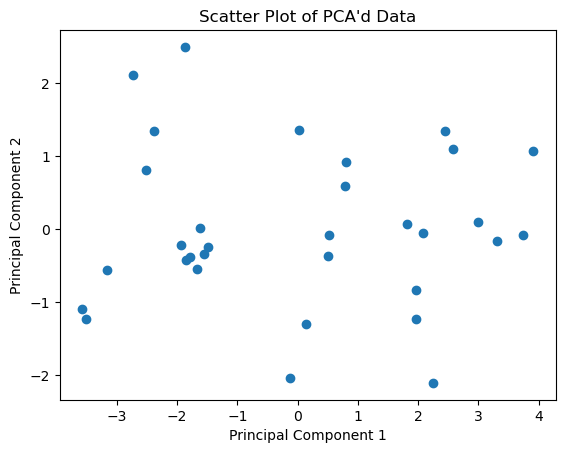

In [24]:
#Task4.2 
#Here we are displaying scatter Plot for the pca data
plt.scatter(cars_pca[:, 0], cars_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA\'d Data')
plt.show()


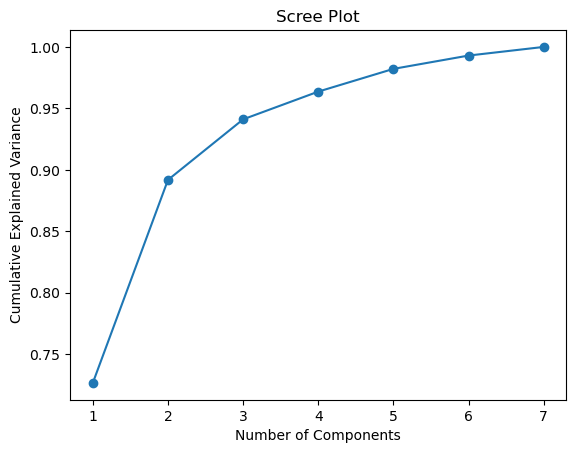

In [25]:
#Task4.3 
#Here we are displaying a scree plot 

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [26]:
#Task4.3 
# Analysis of variance in the first 2 components
variance_in_first_two = cumulative_variance_ratio[1]
print(f"Variance captured in the first 2 components: {variance_in_first_two:.2%}")


Variance captured in the first 2 components: 89.18%


<span style="color:blue">
Note: Our above code will calculate and prints percentage of variance captured by the first two principal components, providing a concise analysis.
</span>

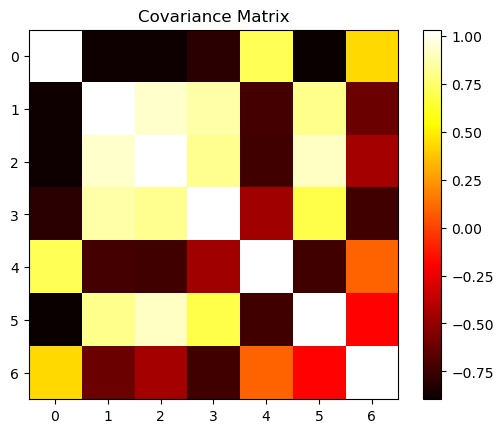

In [27]:
#Task4.4
#Plot the covariance matrix of the dataset.

covariance_matrix = np.cov(cars_standardized, rowvar=False)
plt.imshow(covariance_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix')
plt.show()


<span style="color:blue">
    
*Following PCA, these procedures will provide us with insights into the variance and structure of the data*
*The data are displayed in a reduced-dimensional space using the scatter plot, which also aids in identifying the ideal number of components*
*The covariance matrix and component analysis offer insights into the contributions and correlations between the various elements in the data*
    
</span>

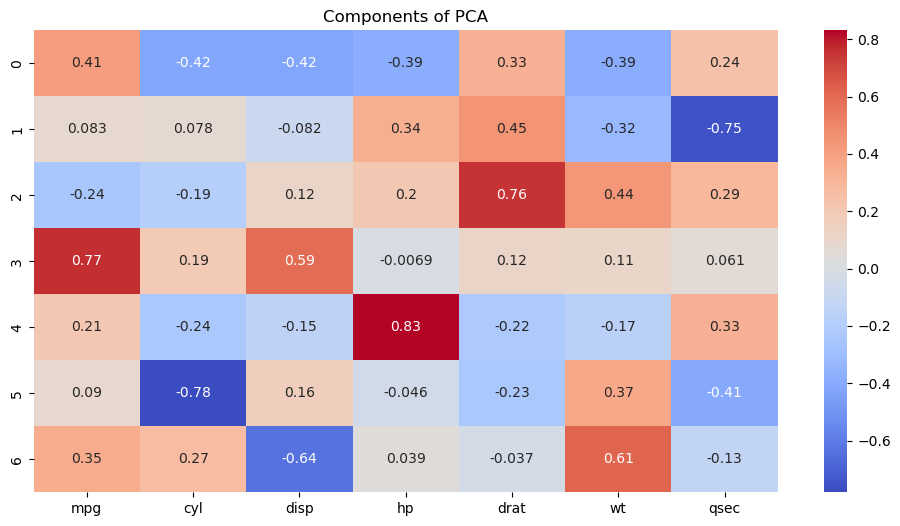

In [28]:
#Task4.5
#Components of datasets
import seaborn as sns

components_df = pd.DataFrame(pca.components_, columns=cars_numerical.columns)
plt.figure(figsize=(12, 6))
sns.heatmap(components_df, cmap='coolwarm', annot=True)
plt.title('Components of PCA')
plt.show()


In [29]:
# Look at the absolute values of the entries in the first two components
abs_components_first_two = np.abs(components_df.iloc[:2, :])

# Identify features with highest representation
highly_represented_features = abs_components_first_two.idxmax(axis=1)

print("Features highly represented in the first two components:")
print(highly_represented_features)


Features highly represented in the first two components:
0     cyl
1    qsec
dtype: object


<span style="color:blue">

    
The features that are highly represented in the first two components, based on the provided PCA analysis, can be identified by examining the absolute values of the entries in the components_df DataFrame. Features with higher absolute values contribute more to the corresponding principal components.
    
</span>

# Coronavirus epidemic dynamics

Here's a task for advanced students. As you all are aware, last spring we saw the outbreak of Covid-19, aka coronavirus. Here, we're going to analyse a dataset from the beginning of the outbreak, when it was just about to spread around the world. 

### Task: Explore data on kaggle.com
1. Go to the website on the kaggle site: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset 
2. Inspect the data on the website and the various ways the site lets you explore it. Registration on the website is not necessary.



## Working with the Coronavirus outbreak data
1. The coronavirus dataset is provided on canvas. Download and save it in the same folder as this notebook.
2. Unzip the data.
3. Verify that the folder in which this notebook resides should now contain a sub-folder named `novel-corona-virus-2019-dataset`

First we load the main dataset into a DataFrame:

In [30]:
df = pd.read_csv(r'D:\UH Data Science\Semster B\ADS Practicals\novel-corona-virus-2019-dataset\novel-corona-virus-2019-dataset\2019_nCoV_data.csv')
df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1714,1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1715,1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1716,1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
1717,1718,02/17/2020 22:00:00,"Seattle, WA",US,2020-02-09T07:03:04,1.0,0.0,1.0


If this fails then please check again whether the dataset folder is unzipped and resides in the same folder as this notebook. Check that the filename in the command matches the filename of the data set on disk.

The `Sno` column contains the serial number and is identical with the aut-generated index column. let's set the Index to track the `Sno` column:

In [31]:
df = df.set_index('Sno')
df 

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1715,02/17/2020 22:00:00,"Madison, WI",US,2020-02-05T21:53:02,1.0,0.0,0.0
1716,02/17/2020 22:00:00,"Orange, CA",US,2020-02-01T19:53:03,1.0,0.0,0.0
1717,02/17/2020 22:00:00,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0


Let's explore the data types.

### Task 6: 
Which features are numeric? Which are continuous? Which are categorical?

<span style="color:blue">
Based on the provided data, we can identify the types of features:

**Numeric Features:** These are represented as measurable quantities.

1. Sno (Serial number)
2. Confirmed
3. Deaths 
4. Recovered 

**Continuous Features:**  

1. Confirmed
2. Deaths
3. Recovered


**Categorical Features:**

'Date', 'Province/State', 'Country', and 'Last Update' are categorical features.
    
'Date' is likely ordinal, representing dates in a specific order.
    
'Province/State', 'Country', and 'Last Update' are nominal, representing categories with no inherent order.
    
 </span>

## Initial exploration
Let's plot the number of number of confirmed cases for the whole data set.

<Axes: xlabel='Sno'>

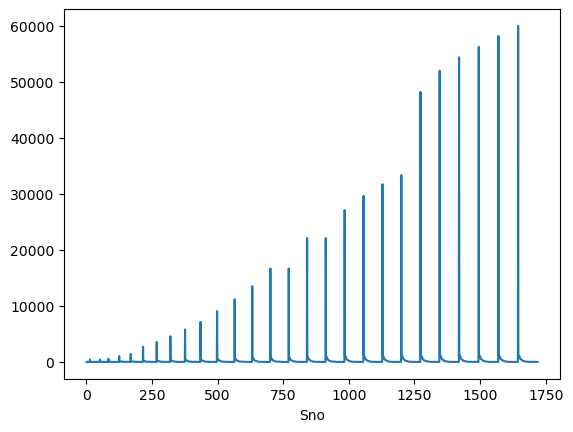

In [32]:
df['Confirmed'].plot()

### Task 7

Is this the plot you expected? Why not? 

<span style="color:blue">
    
*No, this plot is not as expected. Above code creates a plot that ignores the time aspect of the data by using the 'Confirmed' column against the serial numbers ('Sno') for the x-axis*

*In my observation, it would be more appropriate to plot the 'Confirmed' instances against the 'Date' column as the x-axis in order to better comprehend the progression of confirmed cases over time.*
</span>

Solution: The above command naively plots the whole column, but ignores the structure of the data set, where each line applies to a different province/state, or even country.

We need to filter by country! Let's look only at the Hubei province, the root of the outbreak:

In [33]:
df.loc[df['Province/State'] == 'Hubei']

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
Sno,,,,,,,
14,01/22/2020 12:00:00,Hubei,China,01/22/2020 12:00:00,444.0,0.0,0.0
52,01/23/2020 12:00:00,Hubei,Mainland China,01/23/2020 12:00:00,444.0,17.0,28.0
84,01/24/2020 12:00:00,Hubei,Mainland China,01/24/2020 12:00:00,549.0,24.0,31.0
125,01/25/2020 22:00:00,Hubei,Mainland China,01/25/2020 22:00:00,1052.0,52.0,42.0
169,01/26/2020 23:00:00,Hubei,Mainland China,01/26/2020 23:00:00,1423.0,76.0,44.0
216,01/27/2020 20:30:00,Hubei,Mainland China,01/27/2020 20:30:00,2714.0,100.0,47.0
268,01/28/2020 23:00:00,Hubei,Mainland China,01/28/2020 23:00:00,3554.0,125.0,80.0
320,01/29/2020 21:00:00,Hubei,Mainland China,01/29/2020 21:00:00,4586.0,162.0,90.0
376,01/30/2020 21:30:00,Hubei,Mainland China,01/30/2020 21:30:00,5806.0,204.0,116.0


In [34]:
print(df.columns[:10])

Index(['Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')


In [35]:
# x = df.loc[df['Province/State'] == 'Hubei']
# x = df.loc[df["Province/State"] == "Hubei", ["Last Update", "Date"]]
#y = x["Last Update","Date"]

x = df.loc[df["Province/State"] == "Hubei", ["Last Update", "Date"]]

print(x)



              Last Update                 Date
Sno                                           
14    01/22/2020 12:00:00  01/22/2020 12:00:00
52    01/23/2020 12:00:00  01/23/2020 12:00:00
84    01/24/2020 12:00:00  01/24/2020 12:00:00
125   01/25/2020 22:00:00  01/25/2020 22:00:00
169   01/26/2020 23:00:00  01/26/2020 23:00:00
216   01/27/2020 20:30:00  01/27/2020 20:30:00
268   01/28/2020 23:00:00  01/28/2020 23:00:00
320   01/29/2020 21:00:00  01/29/2020 21:00:00
376   01/30/2020 21:30:00  01/30/2020 21:30:00
435   01/31/2020 19:00:00  01/31/2020 19:00:00
498   2020-01-02 23:33:00  02/01/2020 23:00:00
565   2020-02-02 23:43:00  02/02/2020 21:00:00
632   2020-04-02 01:23:00  02/03/2020 21:40:00
701   2020-04-02 23:43:00  02/04/2020 22:00:00
771   2020-05-02 16:43:00  02/05/2020 12:20:00
841   2020-06-02 23:23:00  02/06/2020 20:05:00
912   2020-07-02 14:03:00  02/07/2020 20:24:00
984   2020-09-02 03:03:00  02/08/2020 23:04:00
1056  2020-02-09 23:33:02  02/09/2020 23:20:00
1128  2020-02

In [36]:

y = df.loc[df["Province/State"] == "Hubei", ["Last Update"]]
#print(y["Last Update"].isna().sum())
print(y.iloc[0]["Last Update"])

01/22/2020 12:00:00


That looks better! Let's plot those values:

<Axes: xlabel='Sno'>

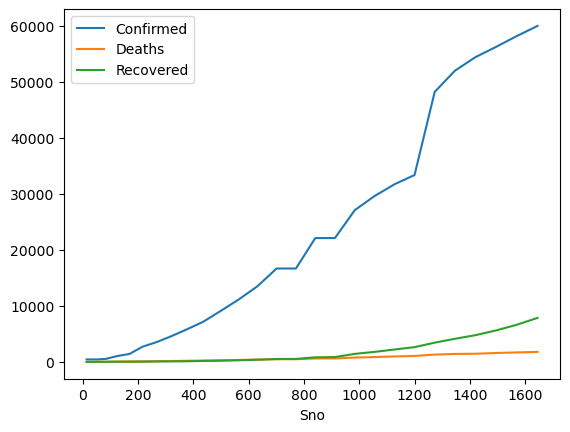

In [37]:
df.loc[df['Province/State'] == 'Hubei'].plot()

Note how the `.plot()` function of the `DataFrame` object already gives us a plot of all numerical features, complete with a legend!

The plot is still lackiong though; It needs for example:
* Dates on the x-axis
* proper labels on the y-axis

### Task 8 (advanced and optional)
* Read the documentation of the `DataFrame.plot` command to learn how to make it plot the date on the x-axis.
* use the `ax = gca()` method the get an axis object, and call the `set_ylabel()` method to set an appropriate y-label.

### Task 9 (advanced and optional)
* Plot the data for all of China.
* Aggregate the data for the rest of the world and plot it.

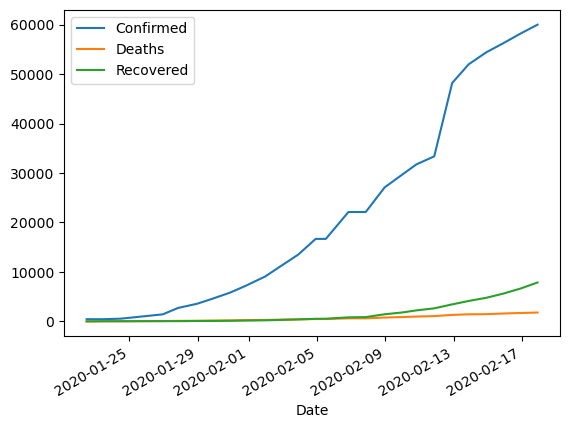

In [38]:
#Task8 plotting by assuming 'Date' as the name of the column containing dates
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca

df['Date'] = pd.to_datetime(df['Date'])  
df.set_index('Date', inplace=True)  

# Plot the data with dates on the x-axis
df.loc[df['Province/State'] == 'Hubei'].plot()
plt.xlabel('Date')  # Set x-label to 'Date'
plt.show()



Sno
14     2020-01-22 12:00:00
52     2020-01-23 12:00:00
84     2020-01-24 12:00:00
125    2020-01-25 22:00:00
169    2020-01-26 23:00:00
216    2020-01-27 20:30:00
268    2020-01-28 23:00:00
320    2020-01-29 21:00:00
376    2020-01-30 21:30:00
435    2020-01-31 19:00:00
498                    NaT
565                    NaT
632                    NaT
701                    NaT
771                    NaT
841                    NaT
912                    NaT
984                    NaT
1056                   NaT
1128                   NaT
1200                   NaT
1273                   NaT
1346                   NaT
1420                   NaT
1495                   NaT
1570                   NaT
1645                   NaT
Name: Last Update, dtype: datetime64[ns]


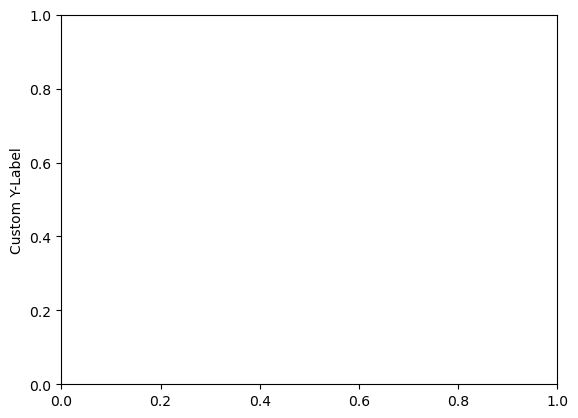

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import gca

#Now,  assume 'Last Update' is the name of the column containing dates
y["Last Update"] = pd.to_datetime(y["Last Update"], errors='coerce', format='%m/%d/%Y %H:%M:%S')

print(y["Last Update"])
# 'Last Update' column as the index
y.set_index('Last Update', inplace=True)

# Task 8 - q2
# Using the ax = gca() method to get an axis object and set y-label
ax = gca()
ax.set_ylabel('Custom Y-Label')  # Set the y-axis label

plt.show()

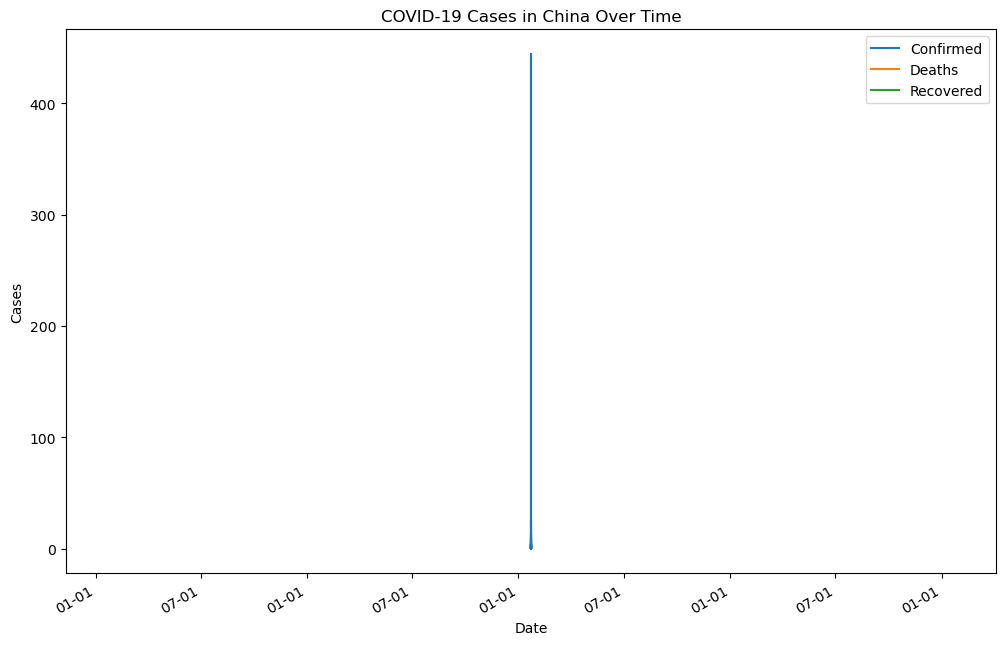

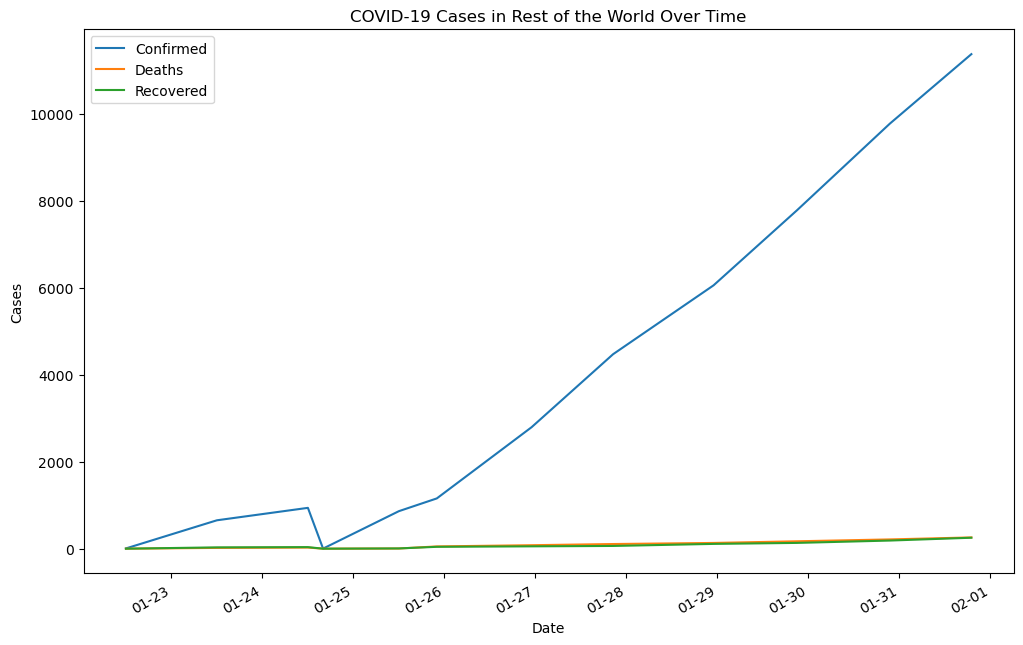

In [40]:
#Task9

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# here we are assuming 'Last Update' is date column
df['Last Update'] = pd.to_datetime(df['Last Update'], errors='coerce')

# Displaying the plot for all of China
df_china = df.loc[df['Country'] == 'China']
ax_china = df_china.plot(x='Last Update', y=['Confirmed', 'Deaths', 'Recovered'], figsize=(12, 8))

# In order to Format the date on the x-axis
ax_china.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# Now, we set y-axis label for China
ax_china.set_ylabel("Cases")
plt.title("COVID-19 Cases in China Over Time")
plt.xlabel("Date")
plt.show()

# here we aggregate data for the rest of the world
df_rest_of_world = df.loc[df['Country'] != 'China']
df_rest_of_world_aggregated = df_rest_of_world.groupby('Last Update').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Displaying the plot for rest of the world
ax_rest_of_world = df_rest_of_world_aggregated.plot(x='Last Update', y=['Confirmed', 'Deaths', 'Recovered'], figsize=(12, 8))

# Now, we are formatting the date on the x-axis
ax_rest_of_world.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# y-axis label for the rest of the world
ax_rest_of_world.set_ylabel("Cases")
plt.title("COVID-19 Cases in Rest of the World Over Time")
plt.xlabel("Date")
plt.show()


## That's it for today!
We have covered have learnt:
* Essential `pandas`; how to create, address and modify `pandas` `DataFrame`s.
* How to perform a data science campaign using PCA.
* Initial loading and ploting of time-series data.

Next week we'll continue our analysis of the coronavirus data, with a special focus on visualisation.